In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
train = pd.read_csv('Train.csv')
train.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time,popularity
0,0.407,0.00380,2,-35.865,1,0.9920,0.944,0.0988,0.1100,113.911,189125,4
1,0.234,0.10500,0,-19.884,1,0.9440,0.900,0.1290,0.0382,76.332,186513,4
2,0.668,0.72600,9,-7.512,1,0.0387,0.000,0.1340,0.4530,124.075,172143,4
3,0.184,0.00561,4,-34.357,1,0.8490,0.931,0.1110,0.0641,79.037,184000,5
4,0.231,0.13100,6,-22.842,1,0.9370,0.000,0.1090,0.0677,109.560,186507,3


In [49]:
train.shape

(18208, 12)

In [50]:
train['popularity'].value_counts()

4    15231
3     2166
5      472
1      323
0       16
Name: popularity, dtype: int64

In [51]:
train['popularity'] = train['popularity'].replace({3:2, 4:3, 5:4})
train['popularity'].value_counts()

3    15231
2     2166
4      472
1      323
0       16
Name: popularity, dtype: int64

In [52]:
test = pd.read_csv('Test.csv')
test.head()

,Store_Ratio,Basket_Ratio,Category_1,Store_Score,Category_2,Store_Presence,Score_1,Score_2,Score_3,Score_4,time
0,0.164,0.994,1,-23.718,0,0.12400,0.99100,0.7890,0.00001,127.602,236436
1,0.586,0.636,4,-7.710,1,0.00208,0.32200,0.1070,0.35500,136.337,253631
2,0.457,0.743,0,-7.591,1,0.40400,0.00931,0.2010,0.68800,154.902,215669
3,0.423,0.748,5,-9.832,1,0.03000,0.22100,0.1690,0.42800,93.977,325200
4,0.802,0.756,2,-10.791,0,0.08430,0.00765,0.0521,0.96300,131.715,288293


In [53]:
test.shape

(12140, 11)

In [54]:
train.duplicated().sum()

2923

In [55]:
train = train.drop_duplicates(keep= 'first')
train.shape

(15285, 12)

In [77]:
x = train.drop('popularity', axis = 1)
y = train['popularity']

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
y_pred = lor.fit(x_train, y_train).predict(x_test)

C:\Users\Akshay\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
from sklearn.metrics import accuracy_score

In [19]:
print(accuracy_score(y_test, y_pred))

0.8406934903500164


In [80]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8370951913640824
              precision    recall  f1-score   support

           0       0.14      1.00      0.25         1
           1       0.25      0.02      0.03        55
           2       0.38      0.09      0.15       367
           3       0.85      0.98      0.91      2569
           4       0.00      0.00      0.00        65

    accuracy                           0.84      3057
   macro avg       0.33      0.42      0.27      3057
weighted avg       0.77      0.84      0.79      3057

[[   1    0    0    0    0]
 [   0    1    5   49    0]
 [   1    3   33  326    4]
 [   5    0   39 2524    1]
 [   0    0    9   56    0]]


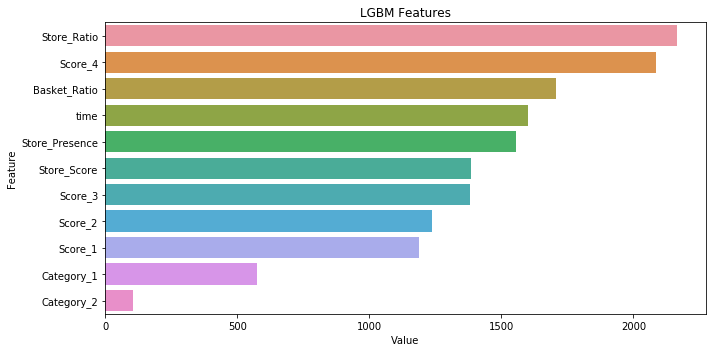

In [81]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LGBM Features')
plt.tight_layout()
plt.show()

In [82]:
x_train = train.drop(['popularity', 'Category_2'], axis = 1)
y_train = train['popularity']
x_test = test.drop('Category_2', axis = 1)
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame(pd.get_dummies(y_pred))
solution.to_csv('Solution.csv', index = False)